In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [281]:
dx = 0.01

In [282]:
N = 3
D2 = (np.eye(N, N, 1) + np.eye(N, N, -1) - 2 * np.eye(N))
D2 /= dx**2
L = (np.kron(D2, np.eye(N)) + np.kron(np.eye(N), D2))
L # equation (4.28)

array([[-40000.,  10000.,      0.,  10000.,      0.,      0.,      0.,
             0.,      0.],
       [ 10000., -40000.,  10000.,      0.,  10000.,      0.,      0.,
             0.,      0.],
       [     0.,  10000., -40000.,      0.,      0.,  10000.,      0.,
             0.,      0.],
       [ 10000.,      0.,      0., -40000.,  10000.,      0.,  10000.,
             0.,      0.],
       [     0.,  10000.,      0.,  10000., -40000.,  10000.,      0.,
         10000.,      0.],
       [     0.,      0.,  10000.,      0.,  10000., -40000.,      0.,
             0.,  10000.],
       [     0.,      0.,      0.,  10000.,      0.,      0., -40000.,
         10000.,      0.],
       [     0.,      0.,      0.,      0.,  10000.,      0.,  10000.,
        -40000.,  10000.],
       [     0.,      0.,      0.,      0.,      0.,  10000.,      0.,
         10000., -40000.]])

In [283]:
mu = 1
# mu * L * np.gradient(u) - np.sum(np.gradient(p))
x = np.arange(0, 10, 1)

f = np.random.rand(5,5)
np.gradient(f)

[array([[-0.19720065, -0.11457416, -0.34510515, -0.03128778, -0.1490911 ],
        [ 0.09178604, -0.25577609,  0.00764575, -0.17820447,  0.25678295],
        [ 0.05058834, -0.18284108,  0.02228616, -0.17849939,  0.2556086 ],
        [ 0.14401899,  0.38521943,  0.0251735 ,  0.30458637, -0.05993312],
        [ 0.56763403,  0.739143  ,  0.36617131,  0.64105037,  0.03157356]]),
 array([[ 0.42312644,  0.31672002, -0.0403754 , -0.23565059, -0.18023677],
        [ 0.50575294,  0.24276778,  0.00126778, -0.13764357, -0.29804009],
        [-0.27199781,  0.23257973,  0.03719622,  0.01348661,  0.68973807],
        [ 0.03889411,  0.2144656 ,  0.00560947,  0.09567887,  0.57017589],
        [ 0.21040308,  0.11373424, -0.04343684, -0.07162001, -0.03930093]])]

In [284]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [285]:
from scipy import linalg
def FiniteDifferenceCoefficient(STENCIL, d):
    l = len(STENCIL)
    A = np.empty((l,l))
    for i in range(l):
        A[i] = STENCIL**i
    V = np.zeros(l)
    V[d] = np.math.factorial(d)
    a = linalg.solve(A, V)
    return a

In [286]:
FiniteDifferenceCoefficient(np.array([-1, 0, 1]), 2)

array([ 1., -2.,  1.])

In [287]:
N = 5
A1 = np.eye(N, k = 1) - np.eye(N, k = -1) 
#A1[0,0] = -3; A1[0,1] = 4; A1[0,2] = -1
#A1[-1,-1] = 3; A1[-1,-2] = -4; A1[-1,-3] = 1
A1 = A1/(dx)
A1
#L1 = (np.kron(A1, np.eye(N)) + np.kron(np.eye(N), A1))
#L1

array([[   0.,  100.,    0.,    0.,    0.],
       [-100.,    0.,  100.,    0.,    0.],
       [   0., -100.,    0.,  100.,    0.],
       [   0.,    0., -100.,    0.,  100.],
       [   0.,    0.,    0., -100.,    0.]])

Solving the Laplace equation:
\begin{equation}
    \nabla^2 \mathbf{u}^* = 0,
\end{equation}

with the boundary conditions:
\begin{equation}
    \mathbf{u}^* = 
    \begin{cases}
        0 & \textrm{on the top edge} \\
        0 & \textrm{on the bottom edge} \\
        1 & \textrm{on the right edge} \\
        1 & \textrm{on the left edge}
    \end{cases}
\end{equation}

In [288]:
N = 50
xx, yy = np.meshgrid(np.arange(N),
                     np.arange(N))
x = xx.flatten()
y = yy.flatten()

D2 = (np.eye(N, N, 1) + np.eye(N, N, -1) - 2 * np.eye(N))
D2 /= dx**2
L = (np.kron(D2, np.eye(N)) + np.kron(np.eye(N), D2))
L # equation (4.28)

# Left:
L[x == 0] = 0
L[x == 0, x == 0] = 1

# Right:
L[x == (N-1)] = 0
L[x == (N-1), x == (N-1)] = 1

# Top:
L[y == 0] = 0
L[y == 0, y == 0] = 1

# Bottom:
L[y == (N-1)] = 0
L[y == (N-1), y == (N-1)] = 1

b_ux = np.zeros(N**2)
b_uy = np.zeros(N**2)

b_ux[x == (N-1)] = 1  # right
b_ux[x == 0]     = 1  # left
b_ux[y == (N-1)] = 0  # top *
b_ux[y == 0]     = 0 # bottom * 

b_uy[x == (N-1)] = 0  # right
b_uy[x == 0]     = 0  # left
b_uy[y == (N-1)] = 0  # top *
b_uy[y == 0]     = 0  # bottom *(i pc)

In [291]:
u_starx = linalg.solve(L, b_ux)
u_stary = linalg.solve(L, b_uy)

#u_star = linalg.solve(L, b_u)

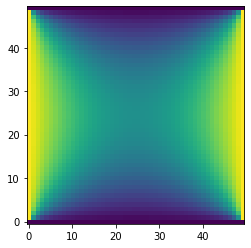

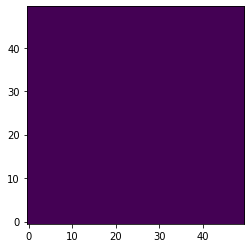

In [292]:
plt.imshow(u_starx.reshape(N,N), origin='lower')
plt.show()

plt.imshow(u_stary.reshape(N,N), origin='lower')
plt.show()

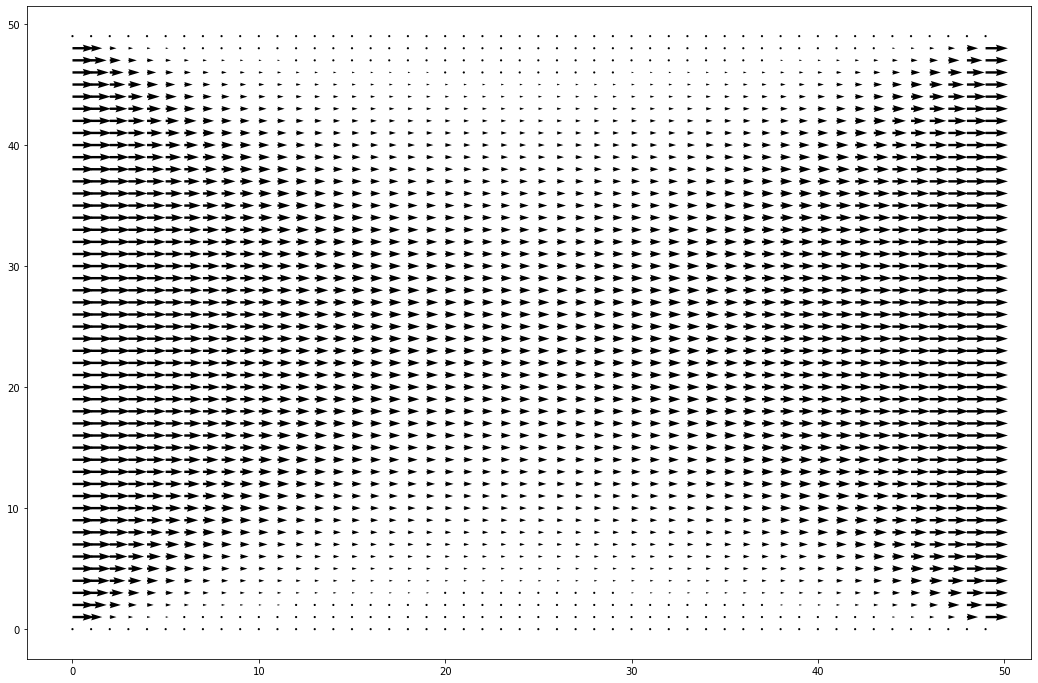

In [293]:
plt.figure(figsize = (18,12))
plt.quiver(xx, yy, u_starx, u_stary)
#plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

\begin{equation}
    \mathbf{u} = \mathbf{u}^* + \nabla \phi \\
    \nabla \cdot \mathbf{u} = \nabla \cdot \mathbf{u}^* + \nabla^2 \phi
\end{equation}
\begin{equation}
    \nabla^2 \phi = - \nabla \cdot \mathbf{u}^*
\end{equation}

In [294]:
FiniteDifferenceCoefficient(np.array([-1, 0, 1]), 1)

array([-0.5,  0. ,  0.5])

In [339]:
D1 = 0.5 * np.eye(N, N, 1) - 0.5 * np.eye(N, N, -1)
D1
L1 = (np.kron(D1, np.eye(N)) + np.kron(np.eye(N), D1))
L1

array([[ 0. ,  0.5,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0.5, ...,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0.5],
       [ 0. ,  0. ,  0. , ...,  0. , -0.5,  0. ]])

In [340]:
np.shape(u_starx), np.shape(L1)

((2500,), (2500, 2500))

In [341]:
Lx = L1 @ u_starx
Ly = L1 @ u_stary

In [320]:
L1X = np.gradient(u_starx.reshape(N, N))[0].flatten()
L1Y = np.gradient(u_starx.reshape(N, N))[1].flatten()

L1XX = np.gradient(u_stary.reshape(N, N))[0].flatten()
L1YY = np.gradient(u_stary.reshape(N, N))[1].flatten()

In [332]:
D1 = 0.5 * np.eye(N, N, 1) - 0.5 * np.eye(N, N, -1)
D1 /= dx
L1 = (np.kron(D1, np.eye(N)) + np.kron(np.eye(N), D1))
#Lx = np.kron(D1, np.eye(N))#+ np.kron(np.eye(N), D1))
#Ly = np.kron(np.eye(N), D1)

In [333]:
#res_ = linalg.solve(L, (-(L1 @ u_starx + L1 @ u_stary)))
phi_x = linalg.solve(L, (-(L1X + L1XX) ))
phi_y = linalg.solve(L, (-(L1Y + L1YY) ))

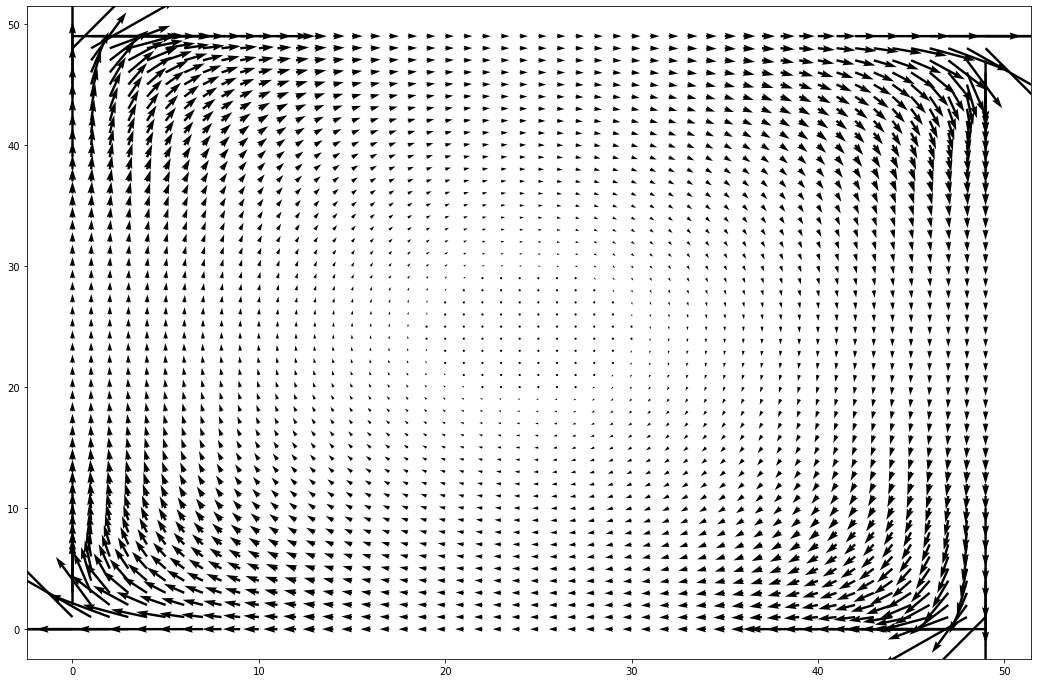

In [334]:
plt.figure(figsize = (18,12))
plt.quiver(xx, yy, phi_x, phi_y)
#plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

In [316]:
dphi_xdx = L1 @ phi_x
dphi_ydy = L1 @ phi_y

In [317]:
ux = u_starx + dphi_xdx
uy = u_stary + dphi_ydy

In [318]:
u_starx.sum()

1248.0000000004798

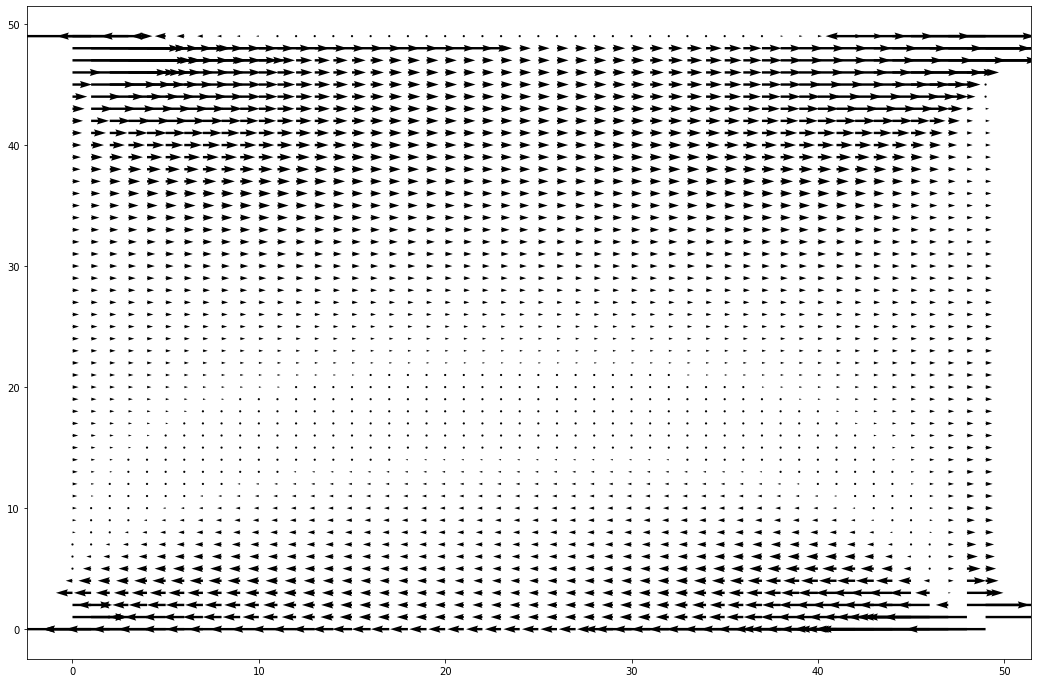

In [319]:
plt.figure(figsize = (18,12))
plt.quiver(xx, yy, ux, uy)
#plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

Solving the equation:
\begin{equation}
    \nabla^2 \phi = - \nabla \cdot \mathbf{u}^*.
\end{equation}

with the boundary conditions (?):
\begin{equation}
    \phi = 
    \begin{cases}
        0 & \textrm{on the top edge} \\
        0 & \textrm{on the bottom edge} \\
        1 & \textrm{on the right edge} \\
        1 & \textrm{on the left edge}
    \end{cases}
\end{equation}

In [303]:
FiniteDifferenceCoefficient(np.array([-1, 0, 1]), 1)

array([-0.5,  0. ,  0.5])

In [304]:
-(L1 @ u_star)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10000 is different from 2500)

In [13]:
#laplace_phi = ( np.gradient(u_star.reshape(N, N))[0].flatten()**2 + np.gradient(u_star.reshape(N, N))[1].flatten()**2 )**(0.5)
laplace_phi = ( np.gradient(u_star.reshape(N, N))[0].flatten()**2 + np.gradient(u_star.reshape(N, N))[1].flatten()**2 )**(0.5)


#laplace_phi = [x == (N-1)] = 1  # right
#laplace_phi = [x == 0]     = 1  # left
#laplace_phi = [y == (N-1)] = 0  # bottom
#laplace_phi = [y == 0]     = 0  # top

In [14]:
phi = linalg.solve(L, laplace_phi)

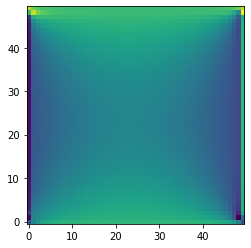

In [28]:
#plt.imshow(phi.reshape(N,N), origin='lower')
plt.imshow((-(L1 @ u_star)).reshape(N, N), origin='lower')

plt.show()

In [16]:
u = u_star + phi

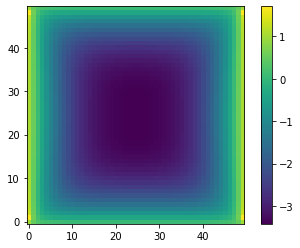

In [17]:
plt.imshow(u.reshape(N,N), origin='lower')
plt.colorbar()
plt.show()